<a href="https://colab.research.google.com/github/heysourin/Deep-Learning--Projects/blob/main/Customer%20Churn/app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [204]:
import pandas as pd
import numpy as np
import seaborn as sns

In [205]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [206]:
df.shape

(10000, 14)

In [207]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [208]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<Axes: xlabel='Geography', ylabel='count'>

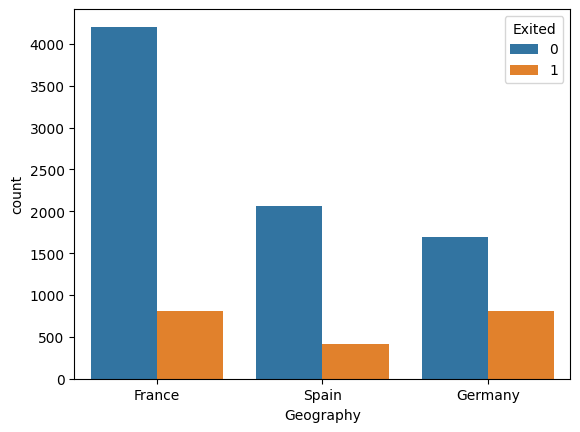

In [209]:
# Which country has exited most:
sns.countplot(x='Geography', hue='Exited', data=df)

<Axes: xlabel='Gender', ylabel='count'>

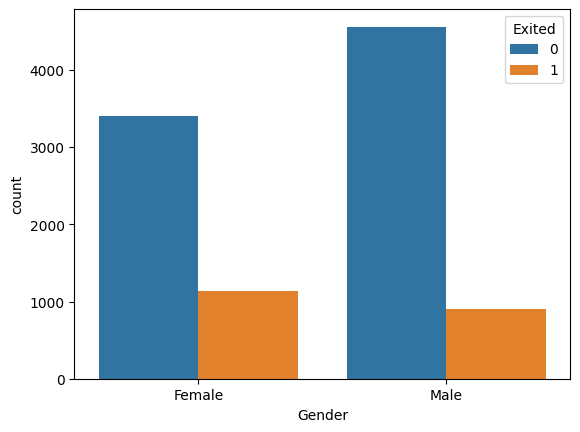

In [210]:
#Which gender has exited the most:
sns.countplot(x='Gender', hue='Exited', data=df)

In [211]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [212]:
# Checking how many customers has exited
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [213]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [214]:
#Checking if there are any duplicated rows:
df.duplicated().sum()

0

In [215]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [216]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [217]:
#Replacing categorical values of 'Geography' and 'Gender'
df = pd.get_dummies(df,columns=['Geography','Gender'], drop_first = True)

In [218]:
X = df.drop(columns=['Exited'], axis = 1)
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [219]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [220]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [221]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [222]:
X_train_trf

array([[ 1.27754581, -1.23264342, -0.012743  , ..., -0.58408625,
        -0.57138416, -1.0862028 ],
       [-0.49959477,  0.28410615,  0.33282985, ...,  1.71207591,
        -0.57138416, -1.0862028 ],
       [ 0.67827747, -0.09508124, -1.39503438, ..., -0.58408625,
        -0.57138416, -1.0862028 ],
       ...,
       [ 2.06279398, -0.28467494, -0.70388869, ..., -0.58408625,
        -0.57138416,  0.9206384 ],
       [-1.02653762,  1.42166833, -0.012743  , ...,  1.71207591,
        -0.57138416,  0.9206384 ],
       [ 0.03768029, -1.04304972,  0.67840269, ..., -0.58408625,
        -0.57138416, -1.0862028 ]])

In [223]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [224]:
# Creaing sequential model
model = Sequential()

model.add(Dense(3, activation = 'sigmoid', input_dim = 11))
# model.add(Dense(11, activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))

In [225]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 3)                 36        
                                                                 
 dense_13 (Dense)            (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [226]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam')

In [227]:
history = model.fit(X_train, y_train, batch_size=50, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 1s 3ms/step - loss: 0.7901 - val_loss: 0.7394
Epoch 2/100
128/128 [==============================] - 0s 2ms/step - loss: 0.7020 - val_loss: 0.6632
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 0.6440 - val_loss: 0.6152
Epoch 4/100
128/128 [==============================] - 0s 3ms/step - loss: 0.6070 - val_loss: 0.5837
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5831 - val_loss: 0.5630
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5675 - val_loss: 0.5488
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5570 - val_loss: 0.5390
Epoch 8/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5496 - val_loss: 0.5317
Epoch 9/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5440 - val_loss: 0.5259
Epoch 10/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5396 - val_lo

In [228]:
history.history

{'loss': [0.790068507194519,
  0.7020461559295654,
  0.6440092325210571,
  0.6070383191108704,
  0.5831373929977417,
  0.5674937963485718,
  0.5570276379585266,
  0.5495964288711548,
  0.5440369844436646,
  0.5396012663841248,
  0.5358986854553223,
  0.5327135324478149,
  0.5299270749092102,
  0.5274564623832703,
  0.5252281427383423,
  0.5232900977134705,
  0.5215312242507935,
  0.519981324672699,
  0.5186777710914612,
  0.5174123644828796,
  0.5163501501083374,
  0.5153999924659729,
  0.5146031975746155,
  0.513878583908081,
  0.5132997035980225,
  0.5127909779548645,
  0.5122871994972229,
  0.5119388103485107,
  0.511569082736969,
  0.5112736225128174,
  0.5110357403755188,
  0.5108035206794739,
  0.5106328129768372,
  0.5104671716690063,
  0.5103427767753601,
  0.510266125202179,
  0.5101418495178223,
  0.5100644826889038,
  0.5099822282791138,
  0.5099414587020874,
  0.5098680257797241,
  0.509823739528656,
  0.5097768902778625,
  0.5097665786743164,
  0.5097110867500305,
  0.5097

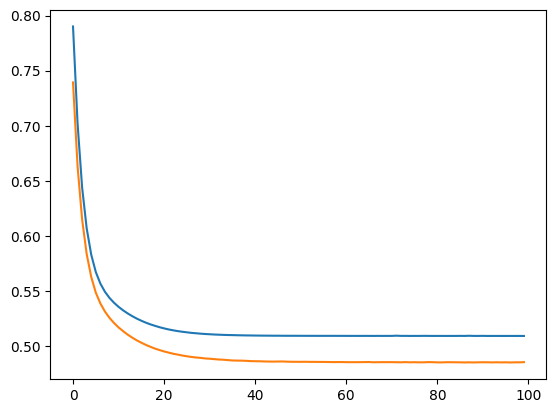

In [240]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [231]:
# Viewing values of weights and bias
model.layers[0].get_weights() # 33 weights and 3 biases

[array([[-0.09749499, -0.30403683,  0.16374707],
        [ 0.16618681, -0.21128626,  0.27033326],
        [-0.45764872,  0.3217447 ,  0.38935316],
        [ 0.28537083,  0.6572222 , -0.01071191],
        [-0.2263425 , -0.15515992, -0.18878067],
        [-0.51669675, -0.13397406,  0.40156856],
        [-0.49777433,  0.30386502, -0.35630518],
        [ 0.30098027, -0.40884173, -0.31233737],
        [ 0.36243796,  0.32281312,  0.30772424],
        [ 0.44541132, -0.50388455,  0.2704304 ],
        [ 0.63706434, -0.25725493, -0.07306951]], dtype=float32),
 array([ 1.0029739e-08,  1.9192986e-02, -1.4708591e-02], dtype=float32)]

In [232]:
model.predict(X_test_trf)

63/63 [==============================] - 0s 1ms/step


array([[0.1084099 ],
       [0.08886881],
       [0.11001134],
       ...,
       [0.16693619],
       [0.12132469],
       [0.1358171 ]], dtype=float32)

In [233]:
# Y_pred using X_test data:
y_scores = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


# **Important**

In [234]:
#************************************* Finding the threshold for 0 or 1 values *************************************
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming y_test are your true labels and y_scores are the predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

print(f"AUC: {roc_auc}")

AUC: 0.5805766408153578


In [235]:
y_pred = np.where(y_scores > roc_auc, 1, 0)

In [236]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8085

In [237]:
# model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
# history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)